In [272]:
from __future__ import print_function
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa

import librosa.display

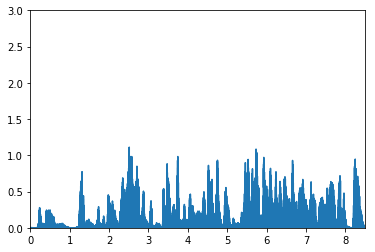

In [273]:
mic1, sr1 = librosa.load("/home/jonas/Documents/Kurser/Master/Talteknologi (DT2112)/Project/Data/overlap_mic1.wav")
mic2, sr2 = librosa.load("/home/jonas/Documents/Kurser/Master/Talteknologi (DT2112)/Project/Data/overlap_mic2.wav")

#mic1 = 3*mic1
mic2_inv = mic2*(-1)
diff = abs(mic1 - mic2_inv)
x = np.linspace(0, 8.5, len(diff))
plt.axis([0, 8.5, 0, 3])
plt.plot(x,diff)
         

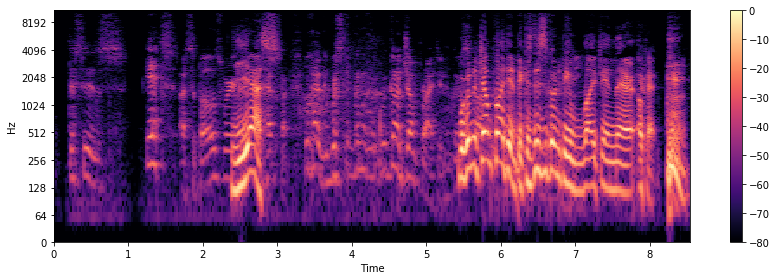

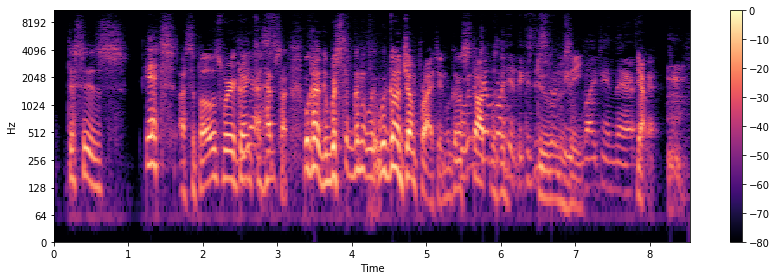

In [277]:
y, sr = librosa.load("/home/jonas/Documents/Kurser/Master/Talteknologi (DT2112)/Project/Data/short_sample.wav", duration=10)
# And compute the spectrogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(mic1))
m, n = S_full.shape
#my_filter = np.ones((m,n))
#my_filter[m/10:,:] = 0
#S_full = np.multiply(S_full, my_filter)

idx = slice(*librosa.time_to_frames([0, 10], sr=sr))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

S_full, phase = librosa.magphase(librosa.stft(mic2))
#m,  = S_full.shape
#my_filter = np.ones((m,n))
#my_filter[m/10:,:] = 0
#S_full = np.multiply(S_full, my_filter)

idx = slice(*librosa.time_to_frames([0, 10], sr=sr))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

In [157]:
y_out = librosa.istft(S_full)
sf.write('short_sample_filtered.wav', y_out, sr, subtype=None, endian=None, format=None, closefd=True)